In [36]:
import pandas as pd
df = pd.read_csv("C:\\Users\\HP\Downloads\\framingham.csv")

In [37]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [39]:
for _ in df.columns:
    if df[_].count() != 4238:
        df.drop(_,axis=1,inplace=True)

In [47]:
df

,male,age,currentSmoker,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,TenYearCHD
0,1,39,0,0,0,0,106.0,70.0,0
1,0,46,0,0,0,0,121.0,81.0,0
2,1,48,1,0,0,0,127.5,80.0,0
3,0,61,1,0,1,0,150.0,95.0,1
4,0,46,1,0,0,0,130.0,84.0,0
...,...,...,...,...,...,...,...,...,...
4233,1,50,1,0,1,0,179.0,92.0,1
4234,1,51,1,0,0,0,126.5,80.0,0
4235,0,48,1,0,0,0,131.0,72.0,0
4236,0,44,1,0,0,0,126.5,87.0,0


In [48]:
df["age"].describe()

count    4238.000000
mean      132.352407
std        22.038097
min        83.500000
25%       117.000000
50%       128.000000
75%       144.000000
max       295.000000
Name: sysBP, dtype: float64

In [49]:
from sklearn.linear_model import LogisticRegression

y = df["TenYearCHD"]
X = df["sysBP"]


log_reg = LogisticRegression()
log_reg.fit(X.to_numpy().reshape(-1,1),y.to_numpy().reshape(-1,1))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

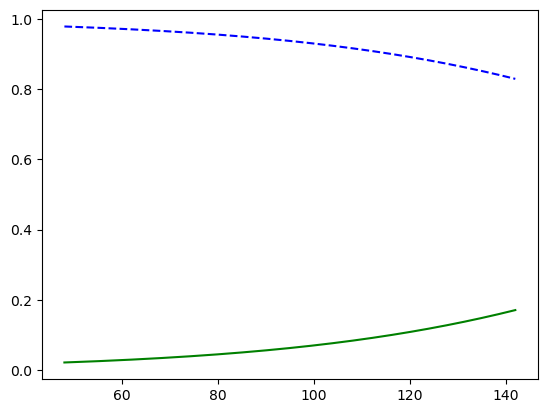

In [50]:
import numpy as np
import matplotlib.pyplot as plt

X_new = np.linspace(48,142,1000)
y_proba = log_reg.predict_proba(X_new.reshape(-1,1))

plt.plot(X_new,y_proba[:,1],"g-",label="0")
plt.plot(X_new,y_proba[:,0],"b--",label="1")